# 1- Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)
print(np.__version__)

from matplotlib import rcParams
rcParams['figure.figsize'] = 13, 6 
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] =False
%config InlineBackend.figure_format = 'retina'

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


2.15.0
1.26.3


In [2]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 2- Resizing images

In [3]:
img_data_size = 224  # Define the size of the image to be resized

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size, img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/scissor"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1117  images to be resized.
1117  images resized.
가위 이미지 resize 완료!


In [4]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size, img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/rock"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1288  images to be resized.
1288  images resized.
바위 이미지 resize 완료!


In [5]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size, img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/paper"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1271  images to be resized.
1271  images resized.
보 이미지 resize 완료!


# 3- Labeling train dataset

In [6]:
import numpy as np

def load_data(img_path, number_of_data=3676):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    # img_size=28
    img_size=img_data_size
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3676 입니다.
x_train shape: (3676, 224, 224, 3)
y_train shape: (3676,)


In [7]:
print(x_train)

[[[[158 157 162]
   [158 157 162]
   [158 157 162]
   ...
   [133 132 137]
   [133 132 137]
   [133 132 137]]

  [[159 158 163]
   [159 158 163]
   [159 158 163]
   ...
   [134 133 138]
   [134 133 138]
   [133 132 137]]

  [[161 160 165]
   [161 160 165]
   [162 161 166]
   ...
   [135 134 139]
   [135 134 139]
   [135 134 139]]

  ...

  [[104  93  91]
   [105  94  92]
   [106  95  93]
   ...
   [  7   6  12]
   [  7   6  12]
   [  7   6  12]]

  [[104  93  91]
   [104  93  91]
   [105  94  92]
   ...
   [  7   6  12]
   [  7   6  12]
   [  7   6  12]]

  [[104  93  91]
   [104  93  91]
   [105  94  92]
   ...
   [  7   6  12]
   [  7   6  12]
   [  7   6  12]]]


 [[[155 154 159]
   [156 155 160]
   [156 155 160]
   ...
   [133 132 138]
   [133 132 138]
   [133 132 138]]

  [[159 158 163]
   [159 158 163]
   [159 158 163]
   ...
   [133 132 138]
   [133 132 138]
   [133 132 138]]

  [[163 162 167]
   [163 162 167]
   [163 162 167]
   ...
   [134 133 139]
   [134 133 139]
   [134 133

In [8]:
print(x_train_norm)

[[[[0.61960784 0.61568627 0.63529412]
   [0.61960784 0.61568627 0.63529412]
   [0.61960784 0.61568627 0.63529412]
   ...
   [0.52156863 0.51764706 0.5372549 ]
   [0.52156863 0.51764706 0.5372549 ]
   [0.52156863 0.51764706 0.5372549 ]]

  [[0.62352941 0.61960784 0.63921569]
   [0.62352941 0.61960784 0.63921569]
   [0.62352941 0.61960784 0.63921569]
   ...
   [0.5254902  0.52156863 0.54117647]
   [0.5254902  0.52156863 0.54117647]
   [0.52156863 0.51764706 0.5372549 ]]

  [[0.63137255 0.62745098 0.64705882]
   [0.63137255 0.62745098 0.64705882]
   [0.63529412 0.63137255 0.65098039]
   ...
   [0.52941176 0.5254902  0.54509804]
   [0.52941176 0.5254902  0.54509804]
   [0.52941176 0.5254902  0.54509804]]

  ...

  [[0.40784314 0.36470588 0.35686275]
   [0.41176471 0.36862745 0.36078431]
   [0.41568627 0.37254902 0.36470588]
   ...
   [0.02745098 0.02352941 0.04705882]
   [0.02745098 0.02352941 0.04705882]
   [0.02745098 0.02352941 0.04705882]]

  [[0.40784314 0.36470588 0.35686275]
   [0.4

## Validation dataset 분리

In [9]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train, test_size=0.3, random_state=55)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

x_train shape: (2573, 224, 224, 3)
y_train shape: (2573,)
x_val shape: (1103, 224, 224, 3)
y_val shape: (1103,)


라벨:  0


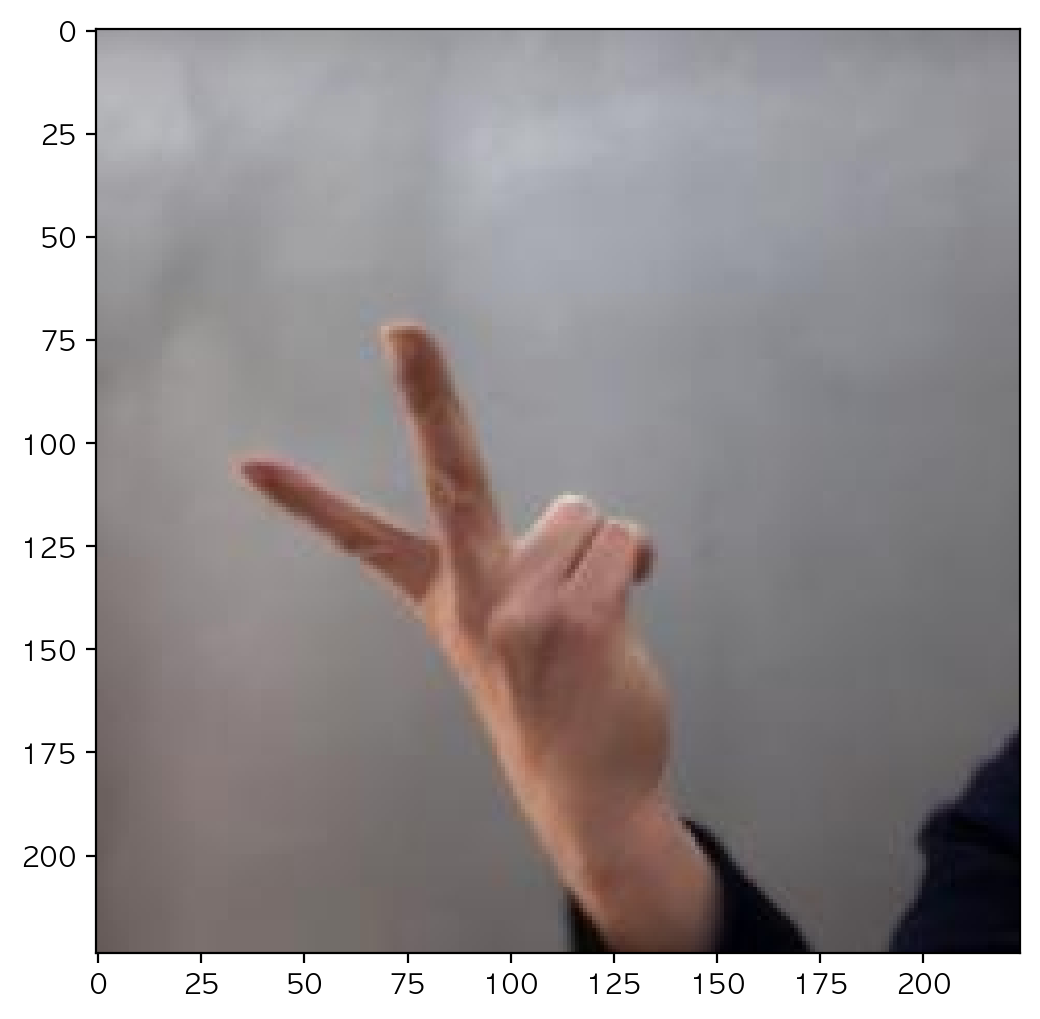

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_train[500])
print('라벨: ', y_train[500])

라벨:  1


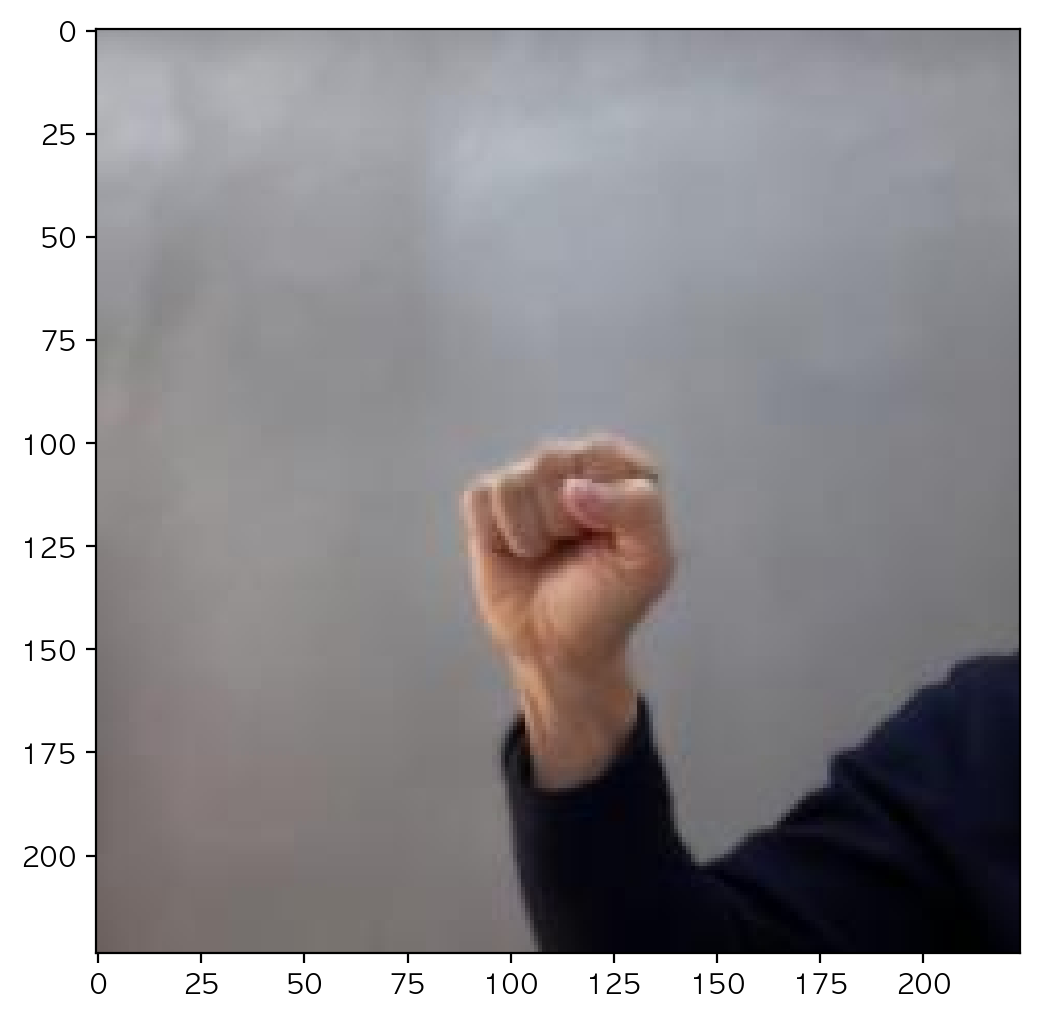

In [14]:
plt.imshow(x_val[120])
print('라벨: ', y_val[120])

# 4- Designing model

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers  # Add this line to import regularizers
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# parameters for tuning model
n_channel_1 = 16
n_channel_2 = 32
n_channel_3 = 64
n_channel_4 = 128
n_dense = 128
n_train_epoch = 100
batch_size_value = 300

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(
    n_channel_1,
    (3, 3),
    activation = 'relu',
    input_shape = (img_data_size, img_data_size, 3)
))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(
    n_channel_2,
    (3, 3),
    activation = 'relu'
))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(
    n_channel_3,
    (3, 3),
    activation = 'relu'
))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(
    n_channel_4,
    (3, 3),
    activation = 'relu'
))
model.add(keras.layers.MaxPooling2D(2, 2))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(
    n_dense,
    activation = 'relu',
    kernel_regularizer=regularizers.l1_l2(.001),  # L1 규제와 L2 규제를 추가
))
model.add(keras.layers.Dropout(0.2)) # 드롭아웃 추가
model.add(keras.layers.Dense(
    3,
    activation = 'softmax'
))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

2024-03-07 09:32:23.386833: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-03-07 09:32:23.386859: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-07 09:32:23.386868: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-07 09:32:23.386901: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-07 09:32:23.386917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


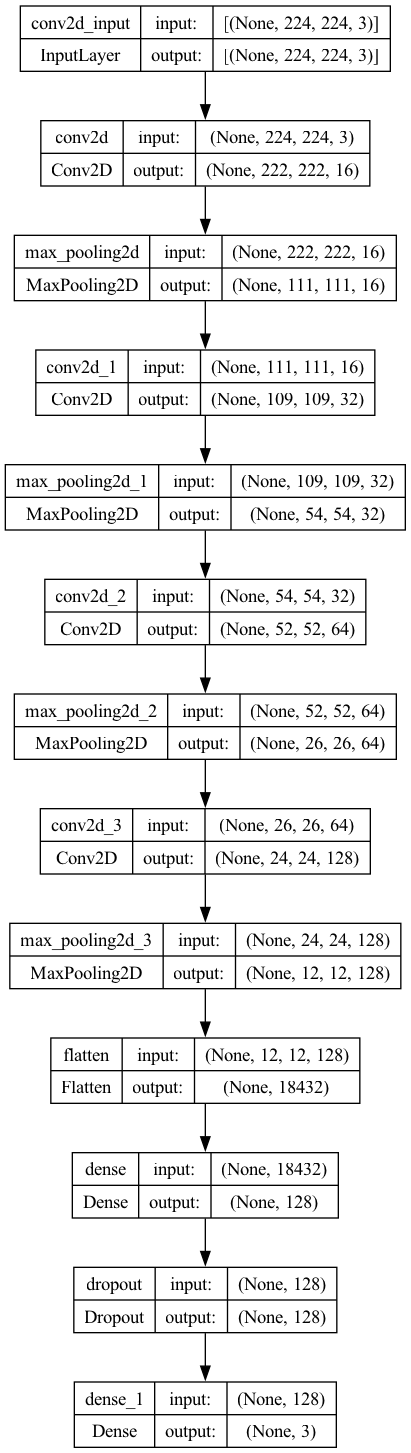

In [16]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

# 5- Compile and training model

In [17]:
# model compile
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


# model early stopping
from tensorflow.keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(
    monitor='val_loss',  # Check the validation loss 
    patience=5,  # If the validation loss does not decrease for 5 epochs, stop the training 
    restore_best_weights=True)  # Keep the best model


# model training
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=n_train_epoch,
    batch_size = batch_size_value,
    callbacks=[early_stopping]  # Add early stopping callback here
)


# model evaluation
val_loss, val_accuracy = model.evaluate(
    x_val, 
    y_val, 
    verbose=2
)

print(f'validation_loss: {val_loss}')
print(f'validation_accuracy: {val_accuracy}')

Epoch 1/100


2024-03-07 09:32:31.596686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 3s 259ms/step - loss: 17.3920 - accuracy: 0.3401 - val_loss: 9.3797 - val_accuracy: 0.3218
Epoch 2/100
9/9 [==============================] - 2s 185ms/step - loss: 6.5489 - accuracy: 0.3599 - val_loss: 4.6147 - val_accuracy: 0.3218
Epoch 3/100
9/9 [==============================] - 2s 178ms/step - loss: 4.2197 - accuracy: 0.3603 - val_loss: 3.2641 - val_accuracy: 0.3218
Epoch 4/100
9/9 [==============================] - 2s 175ms/step - loss: 2.7492 - accuracy: 0.3863 - val_loss: 2.3762 - val_accuracy: 0.3218
Epoch 5/100
9/9 [==============================] - 2s 174ms/step - loss: 2.0762 - accuracy: 0.4415 - val_loss: 1.8139 - val_accuracy: 0.5177
Epoch 6/100
9/9 [==============================] - 2s 179ms/step - loss: 1.6940 - accuracy: 0.5192 - val_loss: 1.5326 - val_accuracy: 0.6355
Epoch 7/100
9/9 [==============================] - 2s 174ms/step - loss: 1.4892 - accuracy: 0.5931 - val_loss: 1.4228 - val_accuracy: 0.6129
Epoch 8/100
9/9 [=======

In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [19]:
print(len(history.epoch))

24


# 6- Evaluation model

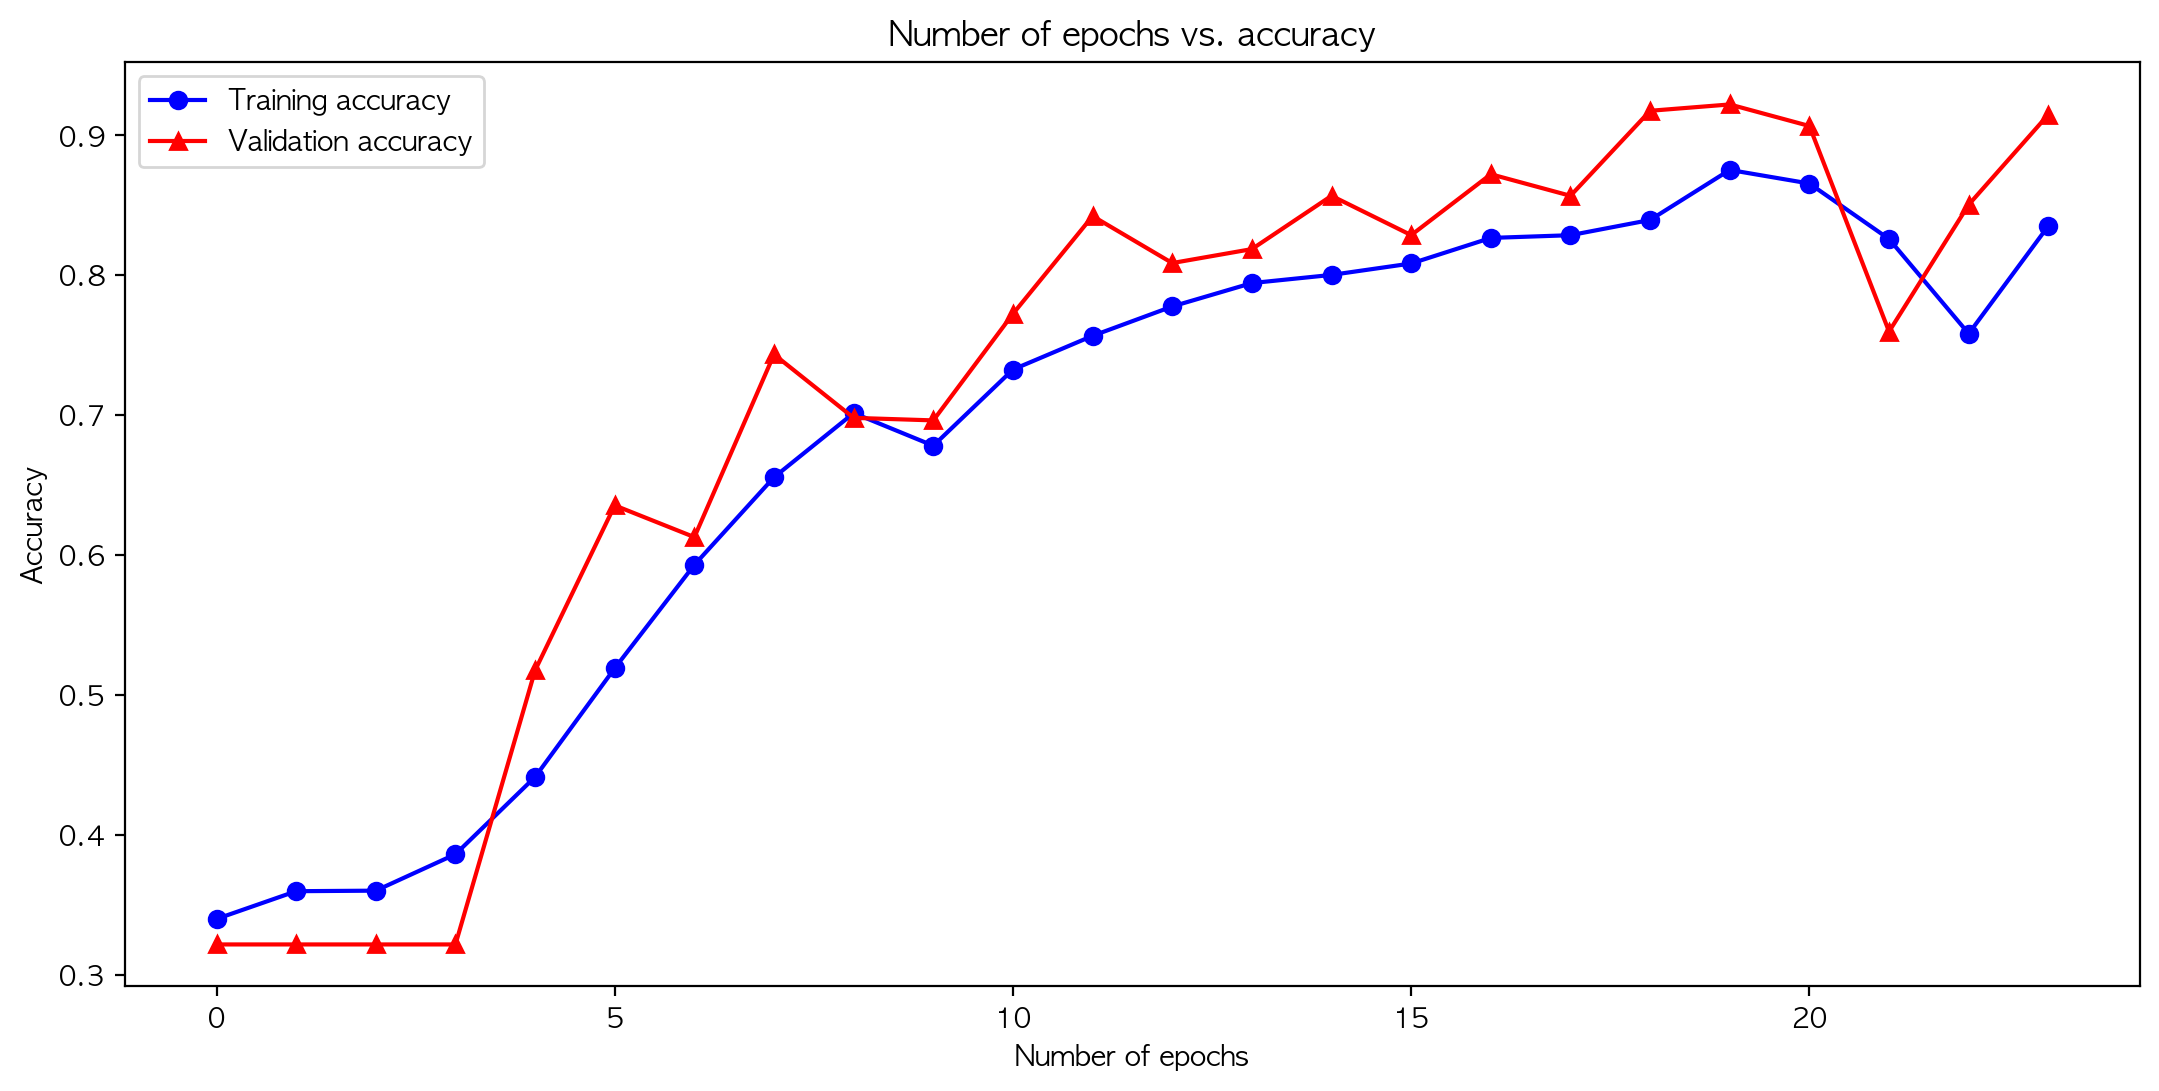

In [20]:
epochs_ = range(0, len(history.epoch))  # number of epochs  
accuracy_train = history.history['accuracy']  ##getting  accuracy of each epochs
accuracy_val = history.history['val_accuracy']  ##getting validation accuracy of each epochs

plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

plt.plot(epochs_, accuracy_val, label = "Validation accuracy", color='red', marker = '^')
plt.title("Number of epochs vs. accuracy")
plt.legend()

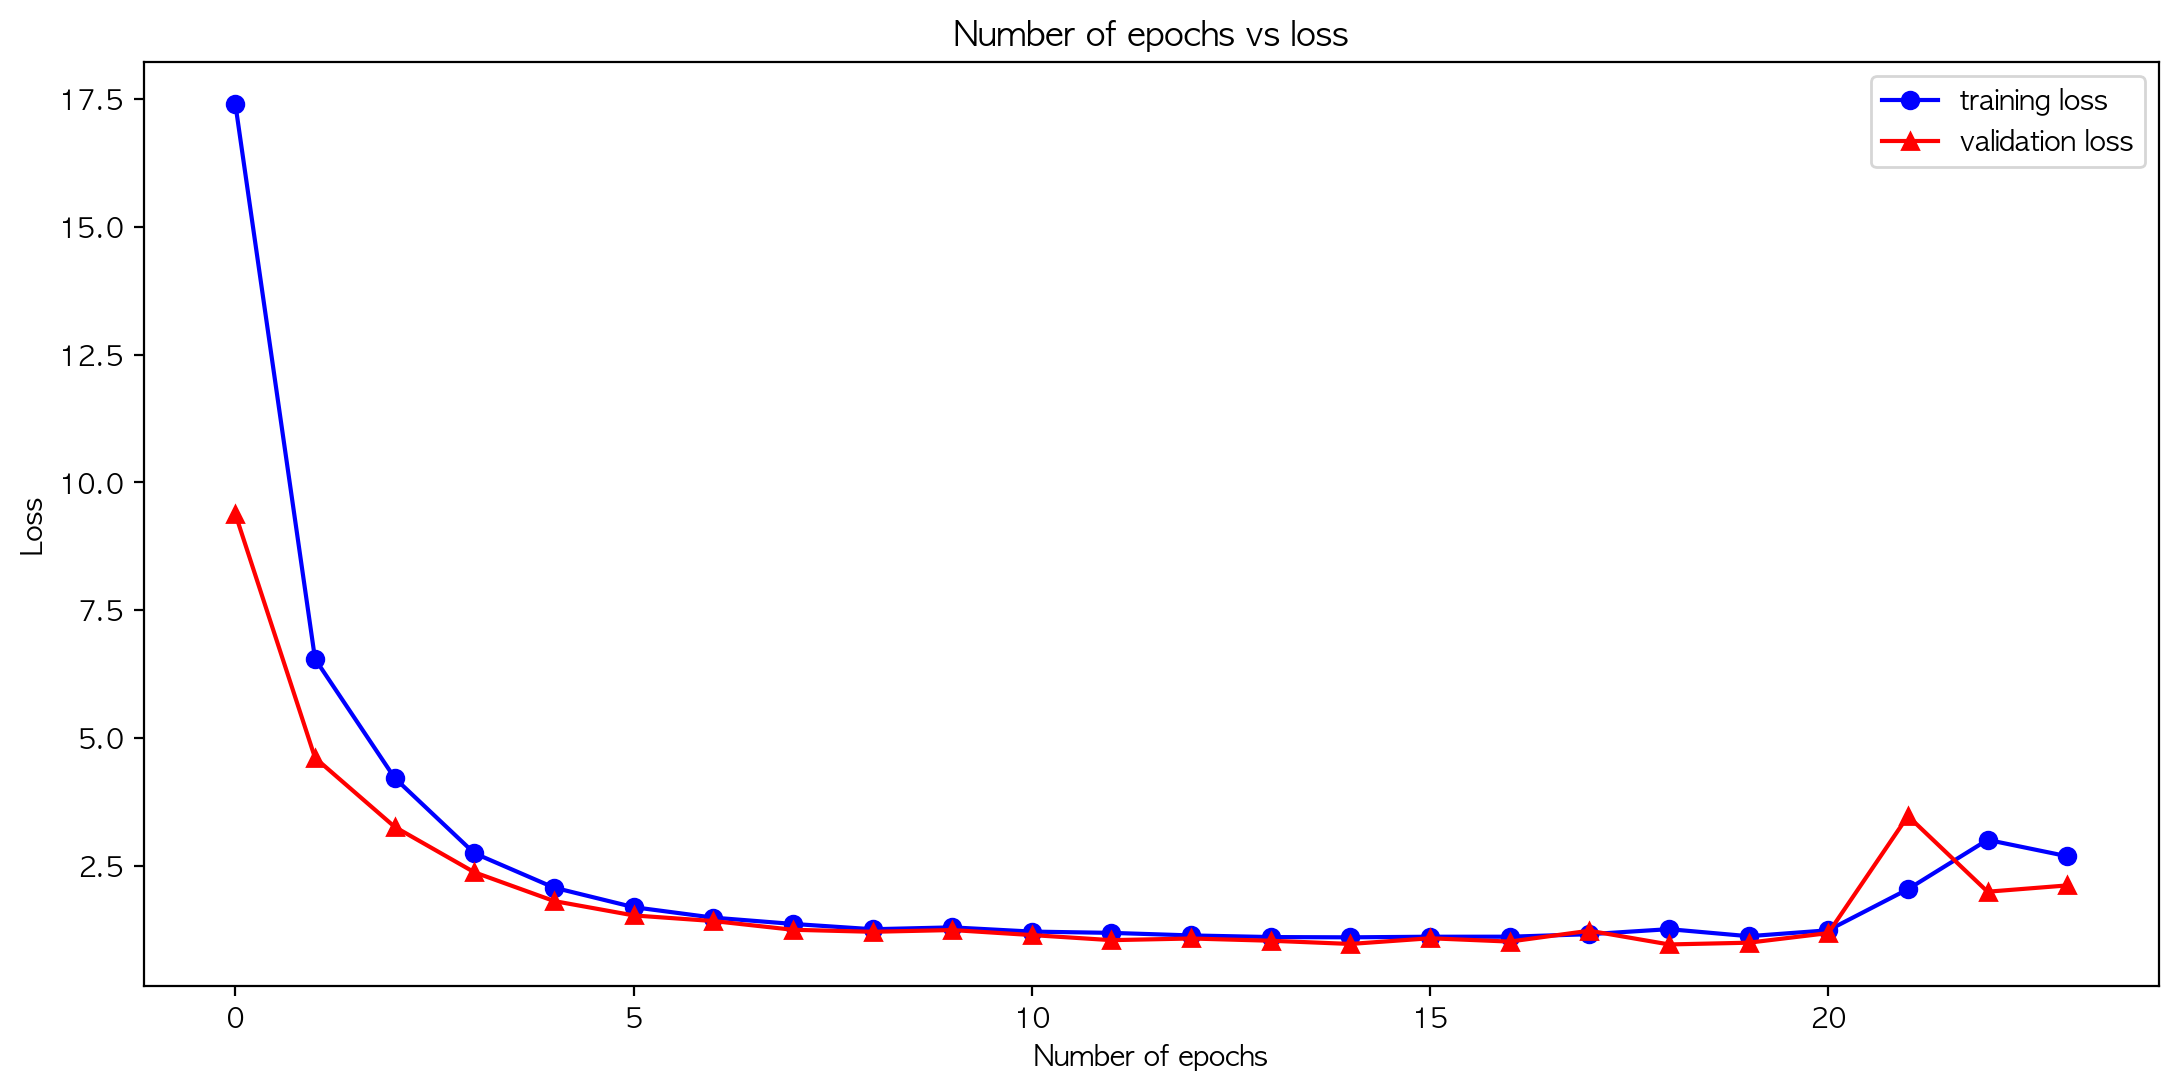

In [21]:
epochs_ = range(0, len(history.epoch))  # number of epochs  
loss_train = history.history['loss']    ##getting  loss of each epochs
loss_val = history.history['val_loss']  ## getting validation loss of each epochs

plt.plot(epochs_, loss_train, label='training loss', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

plt.plot(epochs_, loss_val, label="validation loss", color='red', marker = '^')
plt.title('Number of epochs vs loss')
plt.legend()

### Rename jpg file name with directory and initial

In [22]:
# import os
# import shutil

# def rename_files_in_directory(directory_path, initials):
#     # Get all files in the directory
#     files = os.listdir(directory_path)

#     # Filter out all .jpg files
#     jpg_files = [f for f in files if f.endswith('.jpg')]

#     # Loop over all .jpg files
#     for i, file_name in enumerate(jpg_files):
#         # Create new file name
#         new_file_name = f"{initials}_{i}.jpg"

#         # Get full file paths
#         old_file_path = os.path.join(directory_path, file_name)
#         new_file_path = os.path.join(directory_path, new_file_name)

#         # Rename file
#         shutil.move(old_file_path, new_file_path)

# # Usage
# rename_files_in_directory('/Users/kenny_jung/Downloads/scissor/', 'jh')

# 7- Resizing test image

In [23]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size,img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/scissor"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

635  images to be resized.
635  images resized.
가위 이미지 resize 완료!


In [24]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size,img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/rock"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

675  images to be resized.
675  images resized.
바위 이미지 resize 완료!


In [25]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size,img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/paper"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

648  images to be resized.
648  images resized.
보 이미지 resize 완료!


# 8- Labeling test dataset

In [26]:
import numpy as np

def load_data(img_path, number_of_data=1958):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    # img_size=28
    img_size=img_data_size
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))


학습데이터(x_test)의 이미지 개수는 1958 입니다.
x_test shape: (1958, 224, 224, 3)
y_test shape: (1958,)


In [27]:
print(x_test)

[[[[207 207 205]
   [214 214 212]
   [214 214 212]
   ...
   [218 218 218]
   [227 227 227]
   [226 226 226]]

  [[194 194 192]
   [212 212 210]
   [216 216 214]
   ...
   [217 217 217]
   [221 221 221]
   [222 222 222]]

  [[193 193 191]
   [217 217 215]
   [220 220 218]
   ...
   [215 215 215]
   [213 213 213]
   [213 213 213]]

  ...

  [[172 169 162]
   [172 169 162]
   [172 169 162]
   ...
   [194 193 191]
   [194 193 191]
   [195 194 192]]

  [[171 168 161]
   [171 168 161]
   [172 169 162]
   ...
   [194 193 191]
   [194 193 191]
   [193 192 190]]

  [[170 167 160]
   [170 167 160]
   [171 168 161]
   ...
   [194 193 191]
   [193 192 190]
   [192 191 189]]]


 [[[212 212 210]
   [214 214 212]
   [218 218 216]
   ...
   [212 212 212]
   [224 224 224]
   [222 222 222]]

  [[226 226 224]
   [227 227 225]
   [229 229 227]
   ...
   [212 212 212]
   [223 223 223]
   [222 222 222]]

  [[212 212 210]
   [213 213 211]
   [216 216 214]
   ...
   [214 214 214]
   [224 224 224]
   [225 225

In [28]:
print(x_test_norm)

[[[[0.81176471 0.81176471 0.80392157]
   [0.83921569 0.83921569 0.83137255]
   [0.83921569 0.83921569 0.83137255]
   ...
   [0.85490196 0.85490196 0.85490196]
   [0.89019608 0.89019608 0.89019608]
   [0.88627451 0.88627451 0.88627451]]

  [[0.76078431 0.76078431 0.75294118]
   [0.83137255 0.83137255 0.82352941]
   [0.84705882 0.84705882 0.83921569]
   ...
   [0.85098039 0.85098039 0.85098039]
   [0.86666667 0.86666667 0.86666667]
   [0.87058824 0.87058824 0.87058824]]

  [[0.75686275 0.75686275 0.74901961]
   [0.85098039 0.85098039 0.84313725]
   [0.8627451  0.8627451  0.85490196]
   ...
   [0.84313725 0.84313725 0.84313725]
   [0.83529412 0.83529412 0.83529412]
   [0.83529412 0.83529412 0.83529412]]

  ...

  [[0.6745098  0.6627451  0.63529412]
   [0.6745098  0.6627451  0.63529412]
   [0.6745098  0.6627451  0.63529412]
   ...
   [0.76078431 0.75686275 0.74901961]
   [0.76078431 0.75686275 0.74901961]
   [0.76470588 0.76078431 0.75294118]]

  [[0.67058824 0.65882353 0.63137255]
   [0.6

# 9- Prediction with model

In [29]:
y_pre = model.predict(x_test_norm)

62/62 [==============================] - 1s 9ms/step


# 10- Evaluation

In [30]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 1s - loss: 4.2610 - accuracy: 0.3795 - 887ms/epoch - 14ms/step
test_loss: 4.260997772216797 
test_accuracy: 0.3794688582420349


[[221 414   0]
 [151 522   2]
 [394 254   0]]
              precision    recall  f1-score   support

     scissor       0.29      0.35      0.32       635
        rock       0.44      0.77      0.56       675
       paper       0.00      0.00      0.00       648

    accuracy                           0.38      1958
   macro avg       0.24      0.37      0.29      1958
weighted avg       0.24      0.38      0.30      1958



<Axes: >

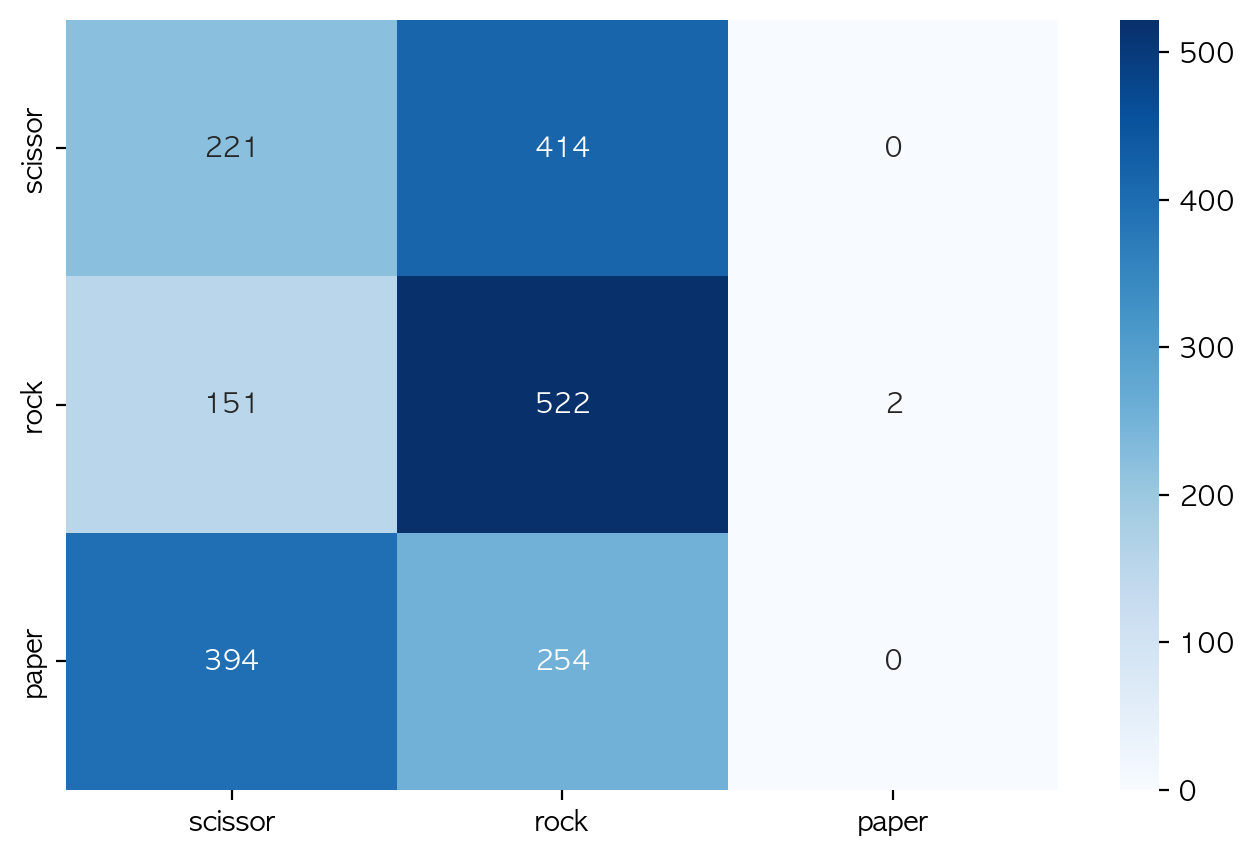

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pre.argmax(axis=1))
cr = classification_report(
    y_test, 
    y_pre.argmax(axis=1), 
    target_names=['scissor', 'rock', 'paper']
)
print(cm)
print(cr)
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(
    cm, 
    annot=True, 
    cmap='Blues', 
    xticklabels=['scissor', 'rock', 'paper'], 
    yticklabels=['scissor', 'rock', 'paper'],
    fmt="g"
)

## 11- VGG16 model pre-trained on ImageNet

In [ ]:
from keras.applications import VGG16
model_vg = VGG16(weights = 'imagenet', include_top = False)  # The VGG16 model pre-trained on ImageNet
model_vg.summary()

In [ ]:
from keras.utils import plot_model
plot_model(
    model_vg, 
    show_shapes=True,
    dpi=100,
)

In [ ]:


def extract_features(directory, samples, df):  # Extract features from the images
    
    features = np.zeros(shape = (samples, 4, 4, 512))  # The dimensions of the features
    labels = np.zeros(shape = (samples))  # The dimensions of the labels
    generator = datagen.flow_from_dataframe(  # Generate batches of tensor image data with real-time data augmentation
        dataframe = df,  # The dataframe containing the file names and labels
        directory = directory,  # The directory of the images
        x_col = 'id',  #  The column of the dataframe that contains the filenames of the images
        y_col = 'has_cactus',  # The column of the dataframe that contains the labels of the images
        class_mode = 'other',  # The type of the labels
        batch_size = batch_size,  # The number of training examples utilized in one iteration       
        target_size = (150,150))   # The dimensions to which all images found will be resized
    
    i=0
    for input_batch, label_batch in generator:
        feature_batch = model_vg.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size] = feature_batch
        labels[i*batch_size:(i+1)*batch_size] = label_batch
        i+=1
        if(i*batch_size>samples):
            break
    return(features, labels)

train.has_cactus = train.has_cactus.astype(int)  # Change the data type of the column 'has_cactus' to integer

features, labels = extract_features(train_dir, 17500, train)  # Extract features and labels from the training images

train_features = features[:15001]
train_labels = labels[:15001]

validation_features = features[15000:]
validation_labels = labels[15000:]